<a href="https://colab.research.google.com/github/srilav/neuralnetwork/blob/main/2_Stacked_AutoEncoder_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stacked AutoEncoder:
    1. just like other neural networks
    2. autoencoders can have multiple hidden layers
    3. in this case stacked autoencoders(or deep autoencoders)

Adding more layers:
    1. helps the autoencoder learn more complex codings
    
One must be careful not to make the autoencoder too powerful:
    1. imagine an encoder so powerful that is just learn to map each input to a single arbitrary number(and the decoder learns the reverse mapping)
    2. Obviously such an autoencoder will reconstruct the training data perfectly
    3. but it will not have learned any useful data reprenstation in the process
    4. and it's unlikely to generalize well to new instances

**Implementing a Stacked AutoEncoder Using Keras**

you can implement a stacken autoencoder very much like a regular deep MLP
    2. the following code builds a stacked AutoEncoder for Fashion MNIST(loaded and normalized)
    3. Using the SELU activation function:

In [ ]:
#the following code builds a stacked AutoEncoder for Fashion MNIST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

x_train shape: (55000, 28, 28)
Number of images in x_train 55000
Number of images in x_test 10000


4


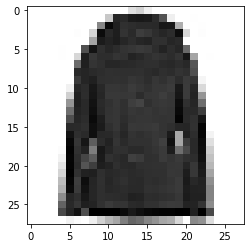

In [ ]:
image_index = 2000 # You may select anything up to 55000
print(y_train[image_index])
plt.imshow(X_train[image_index], cmap='Greys')

In [ ]:
#Set the encoding dimension to 32. 
# Use SeLu activation function for the hidden layers 
# and sigmoid function for the output layer with per-pixel binary cross entropy loss, 
# and the SGD optimizer with learning rate 1.5. 
# Show the training and validation loss for 20 epochs. 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3381 - rounded_accuracy: 0.8870 - val_loss: 0.3165 - val_rounded_accuracy: 0.9004
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3056 - rounded_accuracy: 0.9152 - val_loss: 0.3021 - val_rounded_accuracy: 0.9201
Epoch 3/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2986 - rounded_accuracy: 0.9215 - val_loss: 0.2985 - val_rounded_accuracy: 0.9199
Epoch 4/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2948 - rounded_accuracy: 0.9249 - val_loss: 0.2937 - val_rounded_accuracy: 0.9285
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2923 - rounded_accuracy: 0.9272 - val_loss: 0.2919 - val_rounded_accuracy: 0.9284
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2904 - rounded_accuracy: 0.9289 - val_loss: 0.2915 - val_rounded_accuracy: 0.9305
Epoch 7/20
1719/1719 [==================

In [ ]:
28 * 28